In [129]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [130]:
pd.set_option('display.max_columns', None)

In [131]:
races = {'White': 1,
         'Black': 2,
         'Other or Multiple': 3,
         'Hispanic': 4,
         0: 1,
         'nan': 1};

income_property = {'Below Poverty': 20000,
                   '<= $75,000, Above Poverty': 35000,
                   '> $75,000': 85000,
                    0: 50000,
                    'nan': 50000};

education_level = {'< 12 Years': 1,
                   '12 Years': 2,
                   'Some College': 3,
                   'College Graduate': 4,
                   0: 2,
                   'nan': 2};

def fillna_right(df):
    #df['h1n1_concern'].fillna((df['h1n1_concern'].mean()), inplace=True);
    #df['h1n1_knowledge'].fillna((df['h1n1_knowledge'].mean()), inplace = True);

    for c in df.columns:
        vf = df[c].value_counts();

        if(len(vf) == 2):
            if(vf[0] > vf[1]): df[c].fillna(0, inplace=True);
            else: df[c].fillna(1, inplace=True)
        else:
            mean = 0;
            df[c].fillna((df[c].mean()), inplace=True);
        #print((df[c].value_counts())[0]);
    return df;
        


def transform(features_input):
    #features_input.fillna(0, inplace=True);
    na = 'nan'

    features_input['race'].fillna('nan', inplace=True);
    features_input['income_poverty'].fillna('nan', inplace=True);
    features_input['education'].fillna('nan', inplace=True);
    

    #features_input = fillna_right(features_input);
    features_input['min_age'] = features_input['age_group'].apply(lambda x: int(x[0] + x[1]) if x else x);
    features_input['max_age'] = features_input['age_group'].apply(lambda x: (int(x[5] + x[6]) if '+' not in x else 65) if x else x);
    features_input['marital_status'] = features_input['marital_status'].apply(lambda x: 1 if x == 'Married' else 0);
    features_input['sex'] = features_input['sex'].apply(lambda x: 1 if x == 'Female' else 0);
    features_input['employment_status'] = features_input['employment_status'].apply(lambda x: 1 if x == 'Employed' else 0)
    features_input['rent_or_own'] = features_input['rent_or_own'].apply(lambda x: 1 if x == "Own" else 0)
    
    features_input['race'] = features_input['race'].apply(lambda x: races[x]);
    features_input['income_poverty'] = features_input['income_poverty'].apply(lambda x: income_property[x]);
    features_input['education'] = features_input['education'].apply(lambda x: education_level[x]);

    features_input['employment_occupation'] = features_input['employment_occupation'].apply(lambda x: hash(x) if x != na else hash(random.randbytes(10)));
    features_input['employment_industry'] = features_input['employment_industry'].apply(lambda x: hash(x) if x != na else hash(random.randbytes(10)));
    features_input['census_msa'] = features_input['census_msa'].apply(lambda x: hash(x) if x != na else hash(random.randbytes(10)));
    features_input['hhs_geo_region'] = features_input['hhs_geo_region'].apply(lambda x: hash(x) if x != na else hash(random.randbytes(10)));
    
    
    features_input.drop(columns=['respondent_id'], inplace=True)
    features_input.drop(columns=['age_group'], inplace=True)

    #display(features_input)

    features_input = fillna_right(features_input);
    
    #features_input.drop(columns=['education'], inplace=True)


    return features_input;

def normalization(df):
    df_min_max_scaled = df.copy() 
  
    for column in df_min_max_scaled.columns: 
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
    
    return df_min_max_scaled;

/var/folders/sp/b4k5wlpd68v2jk3xrc5m3wm40000gn/T/ipykernel_24511/630598497.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_input['race'].fillna('nan', inplace=True);
/var/folders/sp/b4k5wlpd68v2jk3xrc5m3wm40000gn/T/ipykernel_24511/630598497.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,min_age,max_age
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.00,0.25,0.25,0.00,0.25,0.000000,0.0,1.0,0.000000,0.0,1.0,0.0,1.000000,-0.304752,0.000000,0.0,-6.488069,-18.251642,0.0,0.0,0.787234,0.967742
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.75,0.75,0.75,0.25,0.75,0.333333,0.0,0.0,0.000000,0.0,0.0,1.0,1.670366,1.000000,0.000000,0.0,-0.822559,2.011244,0.0,1.0,0.361702,0.322581
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.00,0.00,0.75,0.00,0.25,1.000000,0.0,0.0,0.230769,0.0,1.0,1.0,-0.562439,1.000000,0.666667,0.0,-6.468919,1.000000,0.0,0.0,0.000000,0.000000
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.50,0.50,1.00,1.00,0.75,0.00,0.333333,0.0,1.0,0.000000,0.0,0.0,0.0,-0.240885,-0.000000,0.000000,0.0,-6.488069,-18.251642,0.0,1.0,1.000000,1.000000
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.50,0.25,0.50,0.00,0.75,0.666667,0.0,1.0,0.230769,1.0,1.0,1.0,-0.562439,1.000000,0.333333,0.0,-1.238793,10.225834,0.0,0.0,0.574468,0.645161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.00,0.00,1.00,0.25,0.25,0.666667,0.0,1.0,0.230769,0.0,1.0,0.0,-0.562439,-0.304752,0.000000,0.0,-6.488069,-18.251642,0.0,0.0,1.000000,1.000000
26703,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.75,0.25,0.25,1.00,0.00,0.00,1.000000,0.0,0.0,0.230769,0.0,0.0,1.0,3.273147,-0.000000,0.333333,0.0,-4.737809,-6.133011,0.0,0.0,0.000000,0.000000
26704,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.75,0.25,1.00,0.75,0.25,0.666667,0.0,1.0,0.461538,0.0,1.0,0.0,3.273147,1.000000,0.000000,0.0,-6.488069,-18.251642,0.0,1.0,0.787234,0.967742
26705,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00,0.25,0.666667,1.0,1.0,0.230769,1.0,0.0,1.0,-0.240885,-0.304752,0.333333,0.0,-4.737809,-2.065210,0.0,0.0,0.000000,0.000000


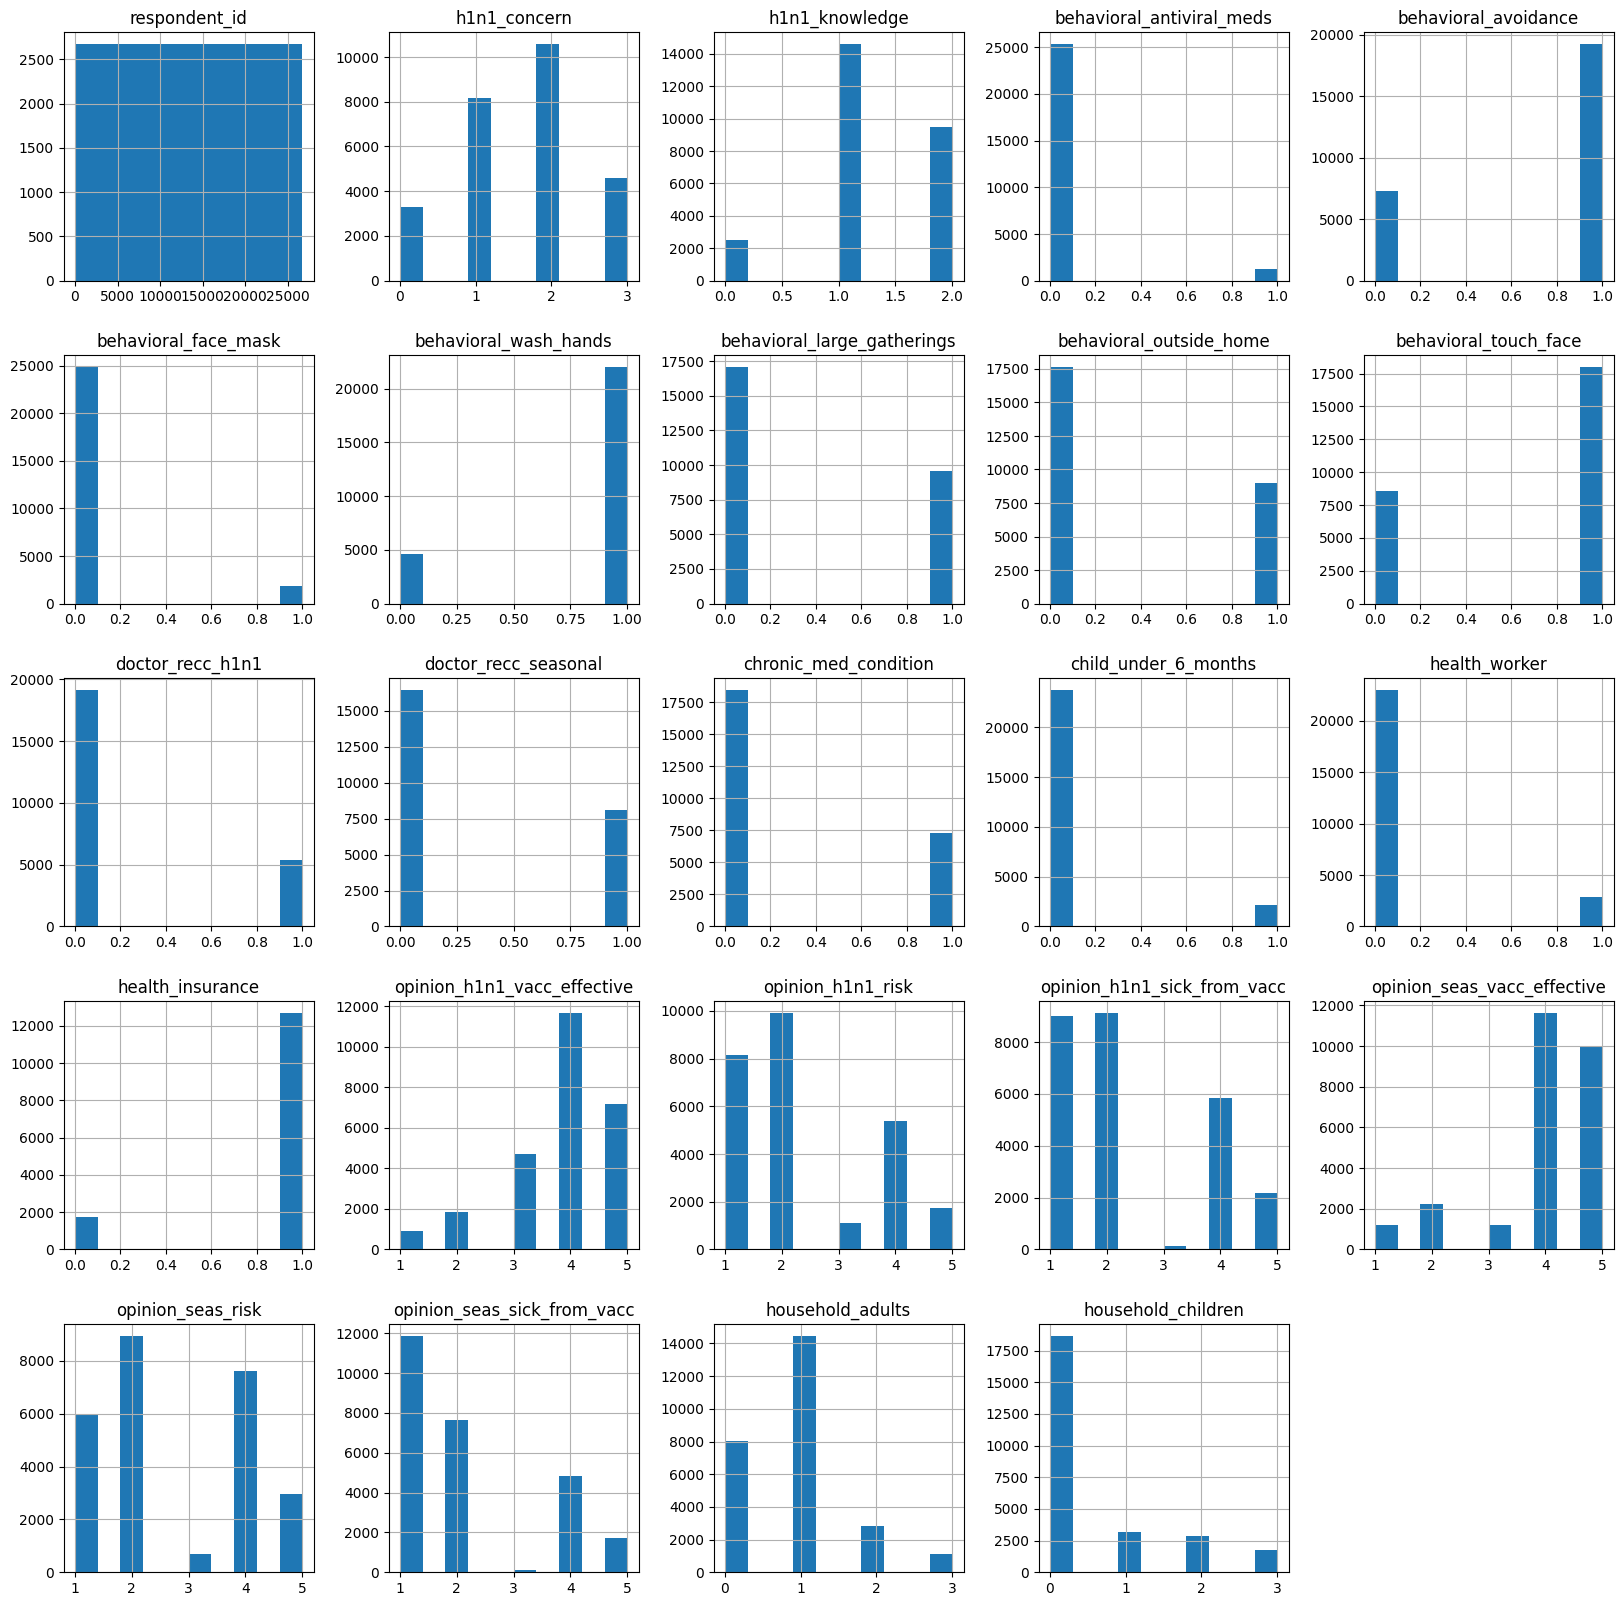

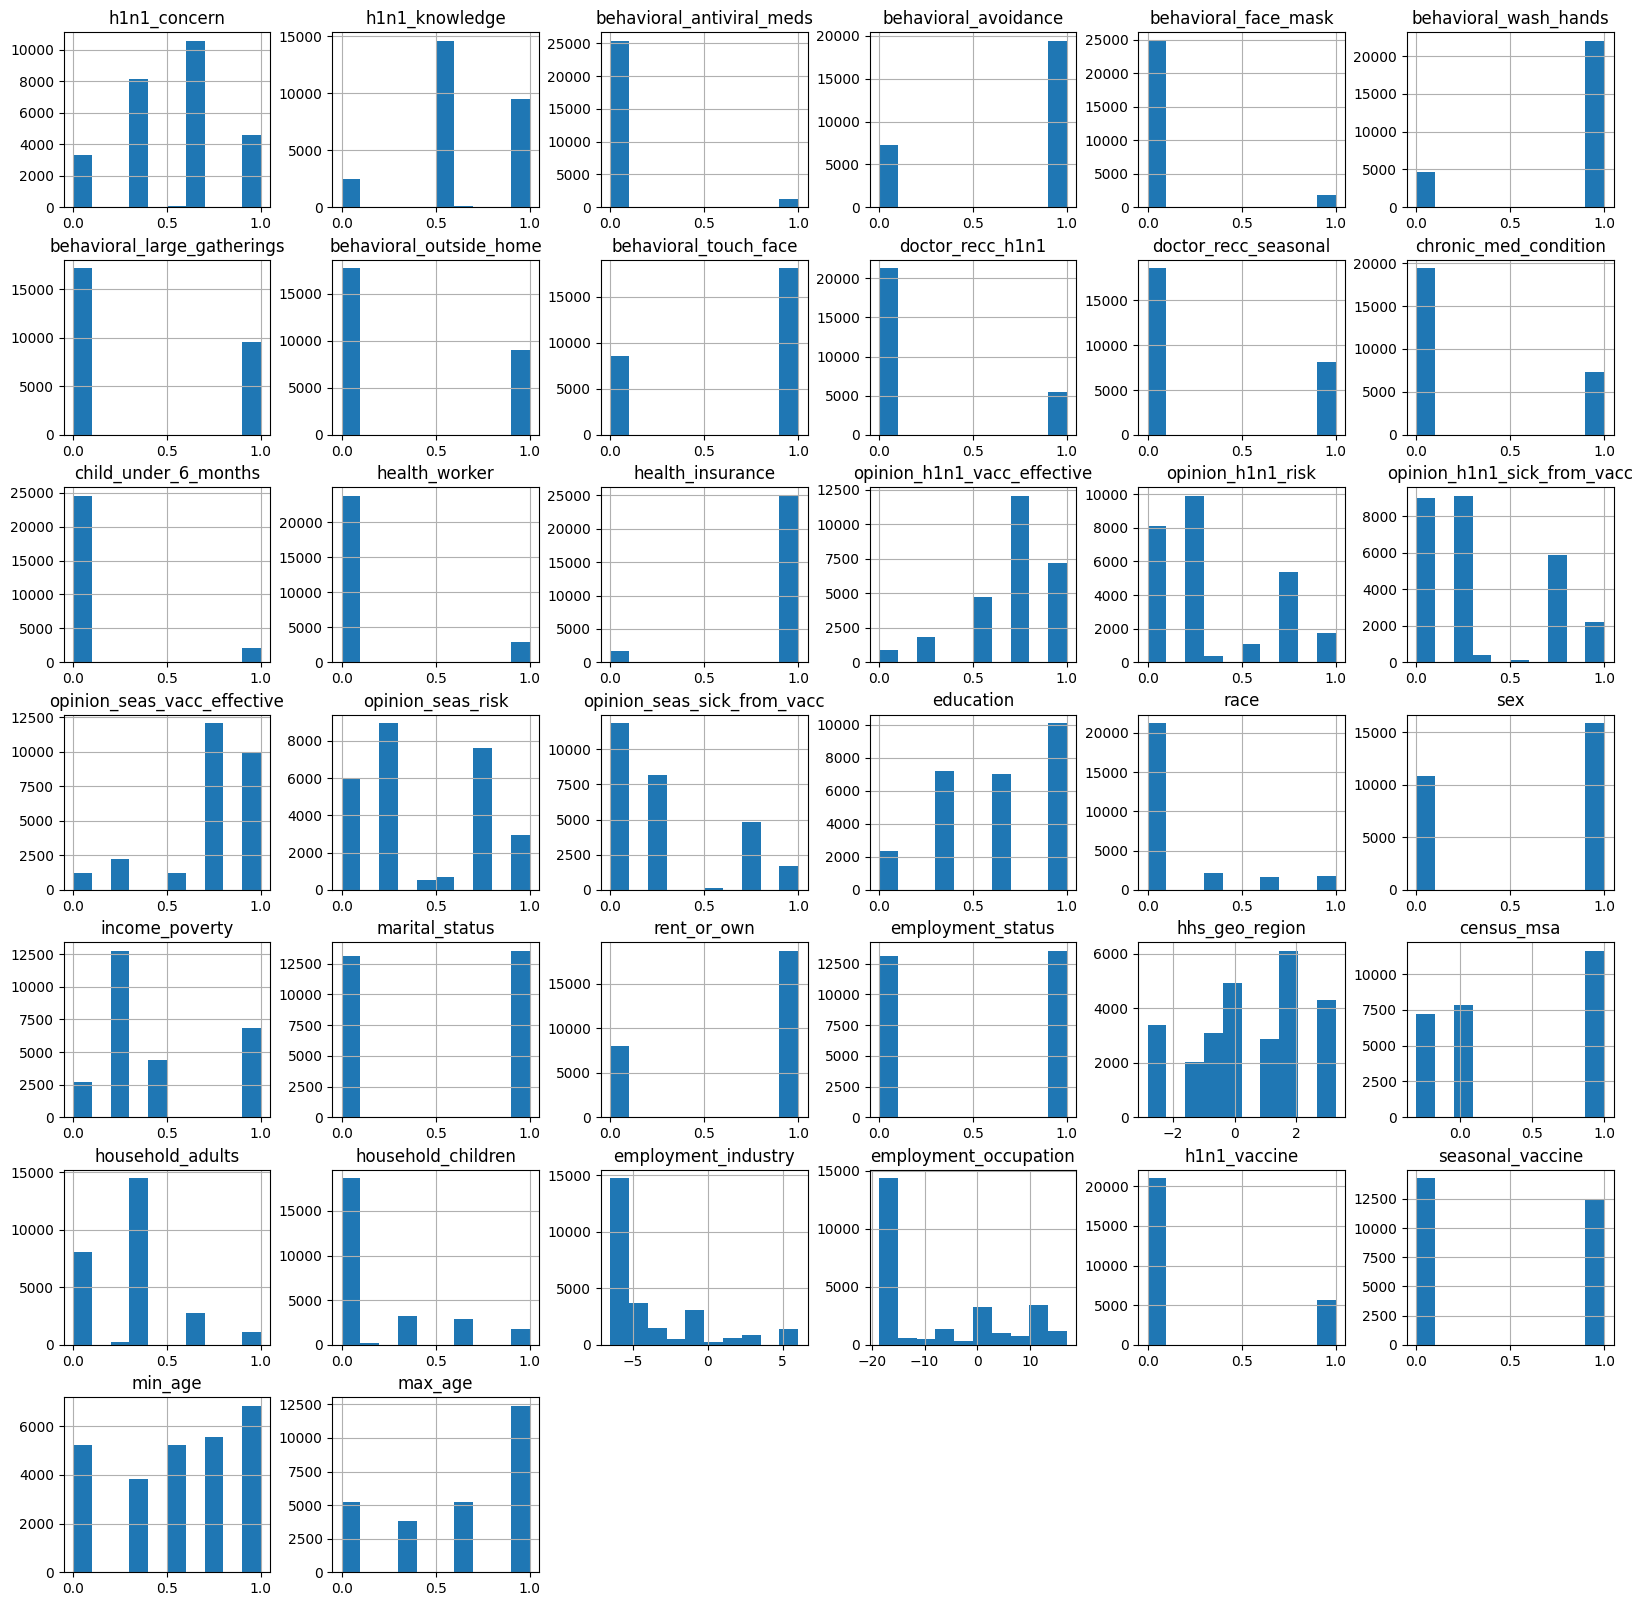

In [132]:
features = pd.read_csv('Flu Shot Learning Features.csv');
labels = pd.read_csv('Flu Shot Learning labels.csv');
#display(features);
features.hist(figsize=(20, 20));


joined = features.merge(labels);

#joined = fillna_right(joined)

joined = transform(joined);

#display(joined)
#joined.info()
joined = normalization(joined);

display(joined)
joined.hist(figsize=(20, 20));

In [133]:
traing_with_label, testing_with_label = train_test_split(joined, test_size=0.0001);

traing_f = traing_with_label.drop(columns=['h1n1_vaccine', 'seasonal_vaccine']);
testing_f = testing_with_label.drop(columns=['h1n1_vaccine', 'seasonal_vaccine']);

traing_l_h1n1 = traing_with_label['h1n1_vaccine'];
traing_l_seas = traing_with_label['seasonal_vaccine'];

testing_l_h1n1 = testing_with_label['h1n1_vaccine'];
testing_l_seas = testing_with_label['seasonal_vaccine'];

display(traing_f);
display(traing_l_h1n1);

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,min_age,max_age
19152,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.00,0.75,0.75,1.00,0.75,0.25,0.666667,0.666667,1.0,0.461538,0.0,0.0,0.0,-0.000000,1.000000,0.000000,0.000000,-6.488069,-18.251642,1.000000,1.000000
12516,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.50,0.25,1.00,1.00,0.25,0.75,0.666667,0.000000,0.0,0.230769,0.0,0.0,1.0,-0.000000,-0.304752,0.000000,0.000000,4.899345,-17.210659,0.574468,0.645161
19936,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.75,0.75,0.25,1.00,0.75,0.00,0.666667,0.000000,1.0,0.230769,0.0,0.0,1.0,1.000000,-0.304752,0.000000,0.000000,-4.737809,-6.133011,0.787234,0.967742
18137,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.25,0.25,1.00,0.75,0.25,1.000000,0.000000,1.0,0.230769,1.0,0.0,1.0,1.000000,-0.304752,0.000000,0.000000,-1.238793,10.225834,0.574468,0.645161
2304,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.75,0.75,0.75,0.25,0.25,1.000000,0.000000,1.0,0.461538,1.0,1.0,1.0,-0.000000,1.000000,1.000000,0.333333,-0.822559,2.011244,0.787234,0.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24273,0.333333,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.00,0.25,0.75,0.00,0.00,0.000000,1.000000,0.0,0.461538,1.0,0.0,0.0,-2.796115,-0.000000,0.333333,0.333333,-6.488069,-18.251642,0.000000,0.000000
16320,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,0.00,1.00,1.00,0.00,1.000000,0.000000,1.0,1.000000,0.0,1.0,1.0,-0.240885,1.000000,0.666667,0.000000,-3.710880,16.908075,0.000000,0.000000
19899,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.75,0.25,0.00,0.75,0.75,1.00,1.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,3.273147,-0.304752,0.333333,1.000000,-6.488069,-18.251642,0.000000,0.000000
15839,1.000000,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.75,1.00,1.00,0.75,0.75,0.333333,0.000000,1.0,0.000000,0.0,1.0,0.0,3.273147,1.000000,0.333333,0.000000,-6.488069,-18.251642,1.000000,1.000000


19152    1.0
12516    0.0
19936    0.0
18137    0.0
2304     0.0
        ... 
24273    0.0
16320    1.0
19899    0.0
15839    0.0
21505    0.0
Name: h1n1_vaccine, Length: 26704, dtype: float64

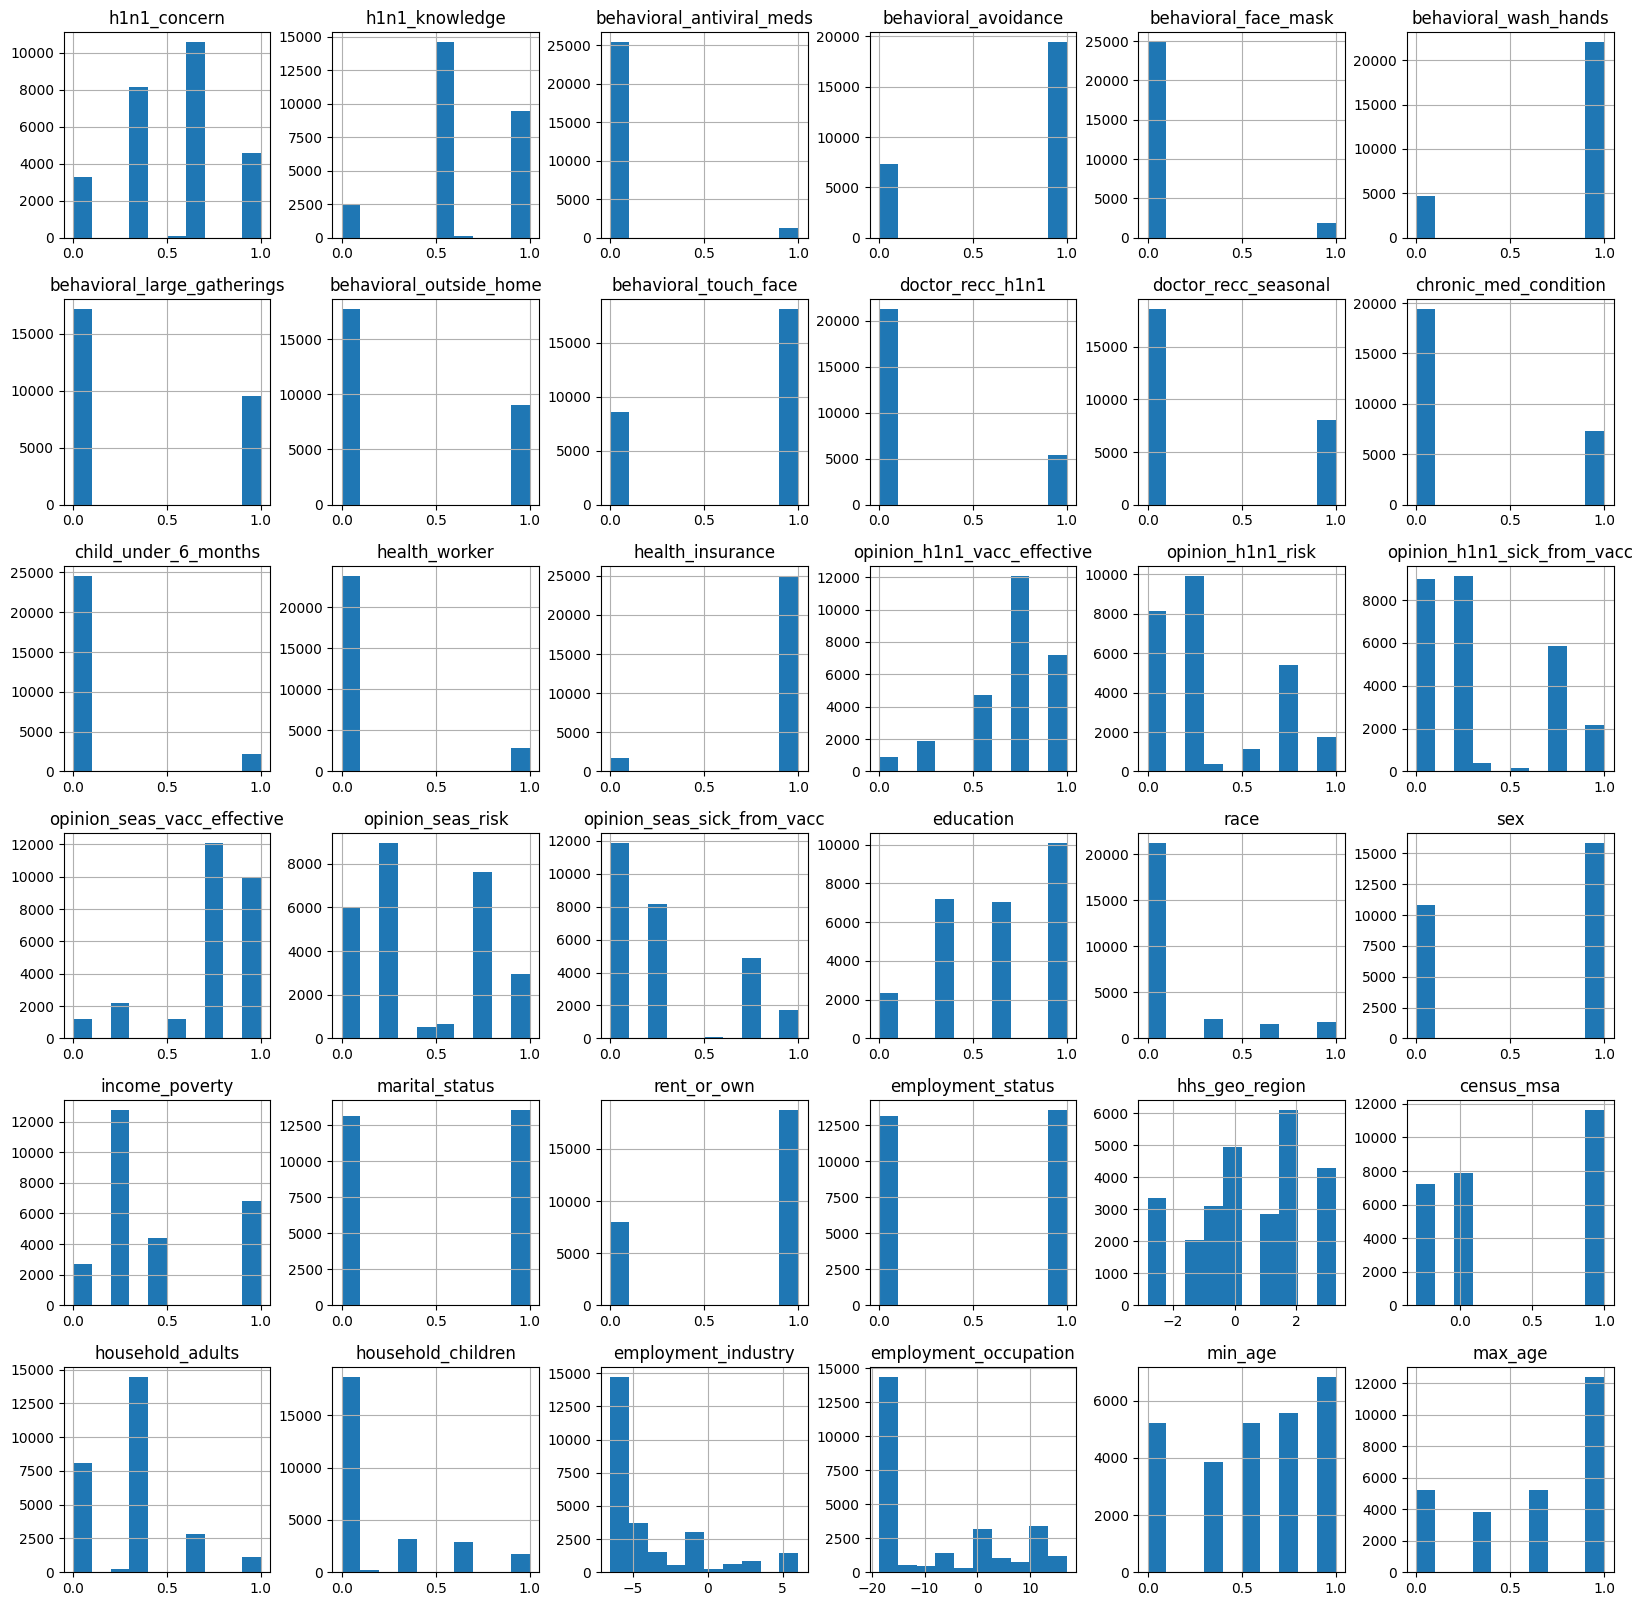

In [134]:
traing_f.hist(figsize=(20, 20));

In [135]:
model_h1m1_vacc = MLPClassifier(max_iter=400000).fit(traing_f.values, traing_l_h1n1.values);
model_seas_vacc = MLPClassifier(max_iter=400000).fit(traing_f.values, traing_l_seas.values);

In [136]:
print(model_h1m1_vacc.predict_proba(testing_f.values));
print(model_seas_vacc.predict_proba(testing_f.values));

print(model_h1m1_vacc.score(testing_f.values, testing_l_h1n1.values));

[[0.97939799 0.02060201]
 [0.18252241 0.81747759]
 [0.96594023 0.03405977]]
[[0.32990367 0.67009633]
 [0.01658335 0.98341665]
 [0.06232191 0.93767809]]
1.0


In [137]:
input_real = pd.read_csv('Flu Shot Learning features real.csv')
print(input_real['hhs_geo_region'].unique())
answer = input_real['respondent_id'];
features_input = input_real;
features_input.fillna(0, inplace=True);
#features_input.drop(columns=['respondent_id'], inplace=True)

display(features_input);

['mlyzmhmf' 'bhuqouqj' 'lrircsnp' 'lzgpxyit' 'fpwskwrf' 'oxchjgsf'
 'dqpwygqj' 'qufhixun' 'kbazzjca' 'atmpeygn']


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,0,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,0,White,Female,0,0,0,0,dqpwygqj,"MSA, Principle City",1.0,1.0,0,0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,0


In [138]:
features_input = transform(features_input);
features_input = normalization(features_input)

display(features_input)

/var/folders/sp/b4k5wlpd68v2jk3xrc5m3wm40000gn/T/ipykernel_24511/630598497.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_input['race'].fillna('nan', inplace=True);
/var/folders/sp/b4k5wlpd68v2jk3xrc5m3wm40000gn/T/ipykernel_24511/630598497.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,min_age,max_age
0,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.2,1.0,0.2,0.2,1.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,-2.796115,1.000000,0.333333,0.000000,4.899345,7.808785,0.361702,0.322581
1,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.2,0.8,0.2,0.2,0.333333,0.000000,0.0,0.000000,0.0,0.0,1.0,1.670366,-0.304752,1.000000,0.000000,4.899345,-9.783557,0.000000,0.000000
2,0.666667,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8,0.4,1.0,0.8,0.8,1.000000,0.000000,0.0,1.000000,1.0,1.0,1.0,-0.240885,-0.304752,0.333333,0.000000,1.937305,10.126455,0.787234,0.967742
3,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.8,0.4,0.4,0.8,0.8,0.4,0.333333,0.000000,1.0,0.230769,1.0,1.0,0.0,-0.240885,1.000000,0.333333,0.000000,-6.488069,-18.251642,1.000000,1.000000
4,1.000000,0.5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.4,0.8,0.8,0.8,0.4,0.333333,0.333333,1.0,0.230769,0.0,1.0,1.0,3.273147,-0.304752,0.000000,0.333333,-4.737809,10.971126,0.361702,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.8,0.4,0.4,0.8,0.4,0.2,0.333333,0.000000,1.0,0.461538,0.0,0.0,0.0,-2.816395,-0.000000,0.333333,0.333333,-6.488069,-18.251642,0.361702,0.322581
26704,1.000000,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.8,0.2,0.2,1.0,0.4,0.4,0.333333,0.000000,0.0,0.000000,1.0,0.0,1.0,-0.562439,-0.304752,0.333333,1.000000,-4.737809,-0.000000,0.000000,0.000000
26705,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8,0.6,0.2,0.8,0.6,0.2,0.666667,0.000000,1.0,0.000000,0.0,0.0,0.0,-0.562439,1.000000,0.333333,0.000000,-6.488069,-18.251642,0.000000,0.000000
26706,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4,0.6,0.8,0.8,0.6,0.4,0.666667,0.000000,1.0,0.230769,1.0,1.0,0.0,1.670366,1.000000,0.333333,0.000000,-6.488069,-18.251642,0.787234,0.967742


In [139]:
pred_h1n1 = (model_h1m1_vacc.predict_proba(features_input));
pred_seas = (model_seas_vacc.predict_proba(features_input));

/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [140]:
df_predictions = pd.DataFrame(pred_h1n1);
df_pred_s = pd.DataFrame(pred_seas);
df_predictions['h1n1_vaccine'] = df_predictions[1];
df_predictions['seasonal_vaccine'] = df_pred_s[1];
df_filter = df_predictions[["h1n1_vaccine","seasonal_vaccine"]]


#answer = answer.merge(df_filter);
df_filter['respondent_id'] = df_filter.index
df_filter['respondent_id'] = df_filter['respondent_id'].apply(lambda x: x + 26707);
df_filter = df_filter.round(4);
display(df_filter)

df_result = df_filter[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']];

display(df_result)

df_result.to_csv("ans.csv", index=False);

/var/folders/sp/b4k5wlpd68v2jk3xrc5m3wm40000gn/T/ipykernel_24511/2692441397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['respondent_id'] = df_filter.index
/var/folders/sp/b4k5wlpd68v2jk3xrc5m3wm40000gn/T/ipykernel_24511/2692441397.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['respondent_id'] = df_filter['respondent_id'].apply(lambda x: x + 26707);


,h1n1_vaccine,seasonal_vaccine,respondent_id
0,0.0510,0.4227,26707
1,0.0571,0.0069,26708
2,0.4809,0.9768,26709
3,0.8720,0.9533,26710
4,0.2945,0.9616,26711
...,...,...,...
26703,0.3956,0.5932,53410
26704,0.0225,0.1550,53411
26705,0.1656,0.1982,53412
26706,0.0030,0.3910,53413


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.0510,0.4227
1,26708,0.0571,0.0069
2,26709,0.4809,0.9768
3,26710,0.8720,0.9533
4,26711,0.2945,0.9616
...,...,...,...
26703,53410,0.3956,0.5932
26704,53411,0.0225,0.1550
26705,53412,0.1656,0.1982
26706,53413,0.0030,0.3910
